# Importing all required things

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve,average_precision_score

# Data Loading and Cleaning

In [6]:
# first i set option to display all columns
pd.set_option('display.max_columns',None)

In [74]:
df=pd.read_csv("/content/drive/MyDrive/credit_data.csv")

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [75]:
# dropping duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df["loan_status"].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

In [76]:
# replacing empty value with null
df.replace("",np.nan,inplace=True)

In [ ]:
# checking for null values in any column
df.columns[df.isnull().sum()>0]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [77]:
df.dropna(subset=['person_emp_length', 'loan_int_rate'],inplace=True)

In [78]:
# deleting one column which is unnecessary loan_percent_income=(loan_amnt/person_income)*100
del df["loan_percent_income"]

In [ ]:
df["loan_status"].value_counts()

loan_status
0    22313
1     6188
Name: count, dtype: int64

In [ ]:
(df["person_age"]>85).sum()

np.int64(4)

In [ ]:
(df["person_emp_length"]>80).sum()

np.int64(2)

In [79]:
df=df[df["person_age"]<=100]

In [80]:
df=df[df["person_emp_length"]<=80]

In [81]:
y=df["loan_status"]
df=df.drop("loan_status",axis=1)

In [82]:
for col in df.select_dtypes(include="float64"):
  df[col]=df[col].astype("float32")
for col in df.select_dtypes(include="int64"):
  df[col]=df[col].astype("int32")

In [83]:
y[df["person_home_ownership"]=="OTHER"].value_counts(normalize=True)

,proportion
loan_status,
0,0.709677
1,0.290323


In [51]:
for col in df.columns:
  print(df[col].value_counts())

person_age
23    3390
22    3143
24    3109
25    2686
26    2188
27    1880
28    1619
29    1488
30    1122
21    1047
31    1006
32     857
33     757
34     624
35     558
36     481
37     409
38     321
39     269
40     235
41     218
42     164
43     142
44     116
45      91
46      86
47      76
48      65
50      45
49      40
51      33
52      33
53      26
54      21
55      18
58      17
57      15
20      14
56      14
60      13
61       8
66       8
64       7
62       6
65       5
59       5
70       5
69       5
63       3
73       2
78       1
80       1
84       1
76       1
67       1
Name: count, dtype: int64
person_income
60000    919
30000    726
50000    672
40000    582
45000    531
        ... 
24543      1
15840      1
51252      1
54833      1
68375      1
Name: count, Length: 3834, dtype: int64
person_home_ownership
RENT        14495
MORTGAGE    11733
OWN          2174
OTHER          93
Name: count, dtype: int64
person_emp_length
0.0     3690
2.0     34

# Encoding by Pipeline

In [62]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,N,2


In [65]:
onehot_cols=["person_home_ownership","loan_intent","cb_person_default_on_file"]
ordinal_cols=["loan_grade"]
numerical_cols=["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","cb_person_cred_hist_length"]

In [66]:
preprocessor=ColumnTransformer(
    transformers=[
        ("onehot",OneHotEncoder(drop="first",sparse_output=False),onehot_cols),
        ("ordinal",OrdinalEncoder(),ordinal_cols),
        ("numerical",StandardScaler(),numerical_cols)
    ],
    remainder="drop" #drop any other columns not listed
)

In [90]:
pipeline=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("smote",SMOTE(random_state=42))
    ]
)

In [84]:
# If you run the pipeline on the full dataset before splitting, steps like scaling or encoding will see the test data.
# This causes data leakage, leading to unrealistic, overly optimistic model performance.
x_train,x_test,y_train,y_test= train_test_split(df,y,test_size=0.2,stratify=y,random_state=42)

In [85]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(loan_status
 0    0.782857
 1    0.217143
 Name: proportion, dtype: float64,
 loan_status
 0    0.782944
 1    0.217056
 Name: proportion, dtype: float64)

In [91]:
x_res,y_res=pipeline.fit_resample(x_train,y_train)

In [93]:
x_test = pipeline.named_steps['preprocessor'].transform(x_test)

In [97]:
onehot_cols_names=pipeline.named_steps["preprocessor"]\
                        .named_transformers_["onehot"]\
                        .get_feature_names_out(onehot_cols)

In [98]:
#combine all feature names
final_features_names=np.concatenate([onehot_cols_names,ordinal_cols,numerical_cols])

In [99]:
x_res=pd.DataFrame(x_res,columns=final_features_names)

In [100]:
x_test=pd.DataFrame(x_test,columns=final_features_names)

In [101]:
x_res

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,-0.440014,0.573865,1.056437,1.357843,0.017939,-0.443593
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.521858,-0.730708,0.309143,-1.239575,-1.324539,1.552193
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.867901,-0.624410,3.049221,0.240717,1.206110,0.554300
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,-0.440014,1.520888,-0.438151,2.423653,0.095093,-0.693067
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.000000,-0.113035,-0.489121,-0.438151,-0.418506,0.517897,-0.194120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35687,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.000000,-0.675052,-0.285482,-0.718319,0.755879,1.346573,-0.443593
35688,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.039244,-0.766993,0.162427,0.279817,2.263122,0.595670,-0.922959
35689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,-0.749410,0.490104,0.558241,-0.627347,1.635809,-0.443593
35690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.000000,-1.093971,-1.023429,-1.057317,-0.777718,0.664103,-0.507754


In [103]:
joblib.dump((x_res,x_test,y_res,y_test),"/content/drive/MyDrive/credit.pkl")

['/content/drive/MyDrive/credit.pkl']

In [3]:
(x_res,x_test,y_res,y_test)=joblib.load("/content/drive/MyDrive/credit.pkl")

# EDA and Visualizations

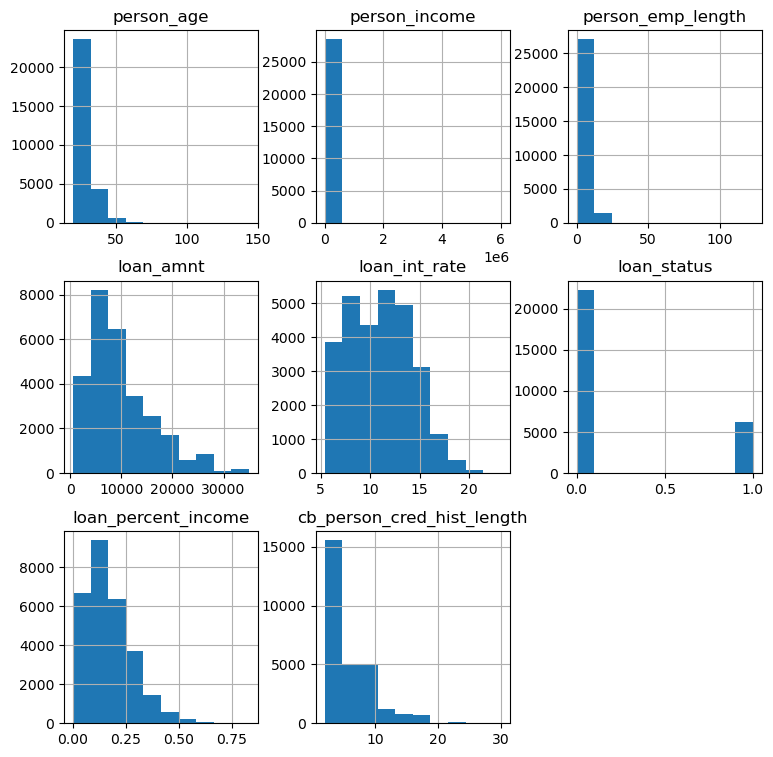

In [ ]:
# hist plot
_=df.hist(figsize=(9,9))

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


<Axes: xlabel='person_home_ownership', ylabel='count'>

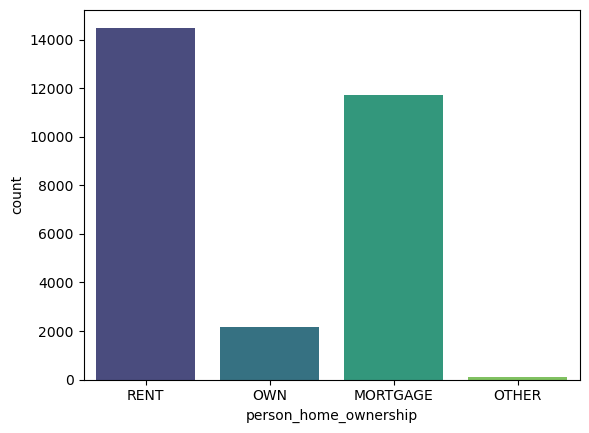

In [ ]:
sns.countplot(x="person_home_ownership",hue="person_home_ownership",data=df,palette="viridis")

/tmp/ipython-input-17-1572176800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_intent.index,y=loan_intent.values,palette="magma")


<Axes: xlabel='loan_intent'>

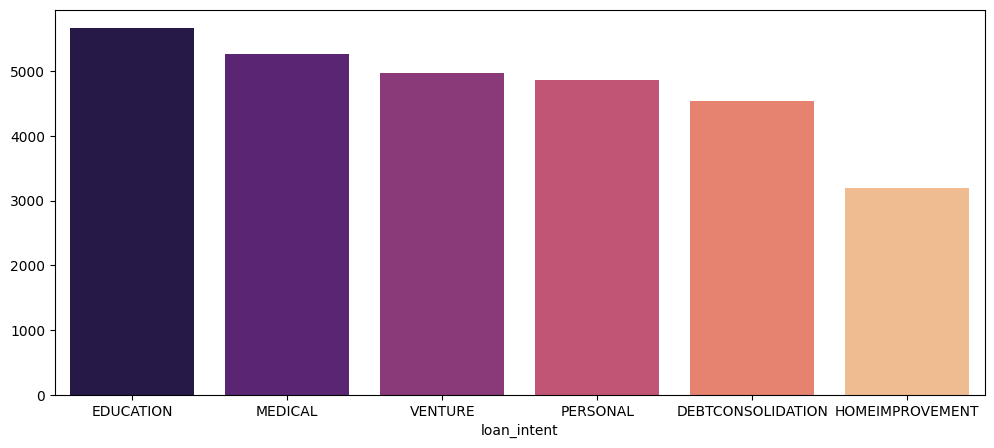

In [17]:
plt.figure(figsize=(12,5))
loan_intent=df["loan_intent"].value_counts()
sns.barplot(x=loan_intent.index,y=loan_intent.values,palette="magma")

<Axes: xlabel='loan_grade', ylabel='count'>

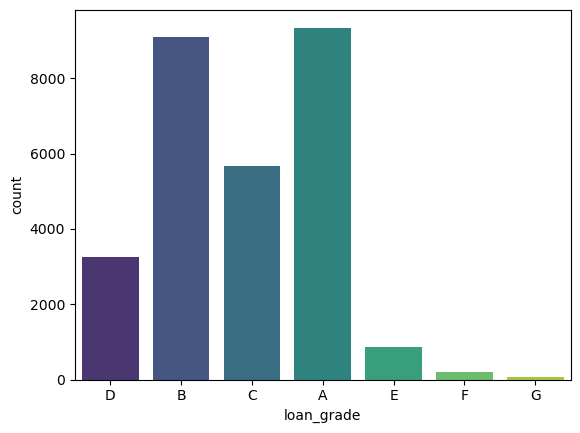

In [ ]:
sns.countplot(x="loan_grade",hue="loan_grade",data=df,palette="viridis")

<Axes: xlabel='loan_status', ylabel='count'>

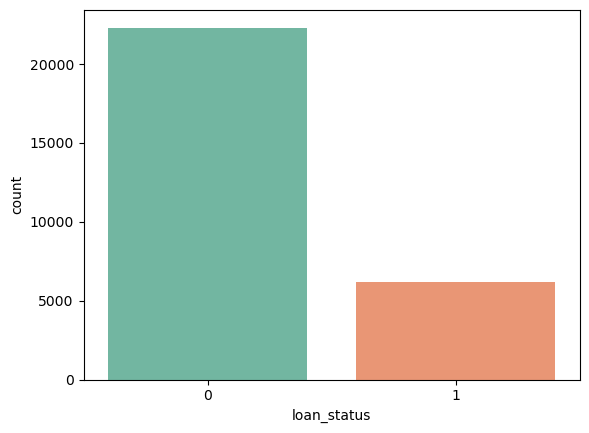

In [ ]:
sns.countplot(x="loan_status",hue="loan_status",legend=False,data=df,palette="Set2")

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

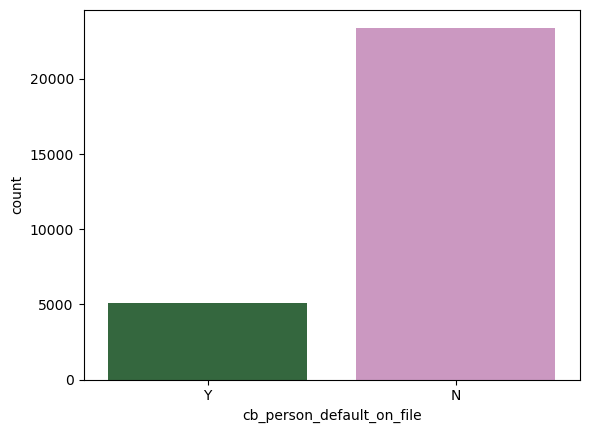

In [ ]:
sns.countplot(x="cb_person_default_on_file",hue="cb_person_default_on_file",data=df,palette="cubehelix")

# Training Models

In [22]:
def report(model,y_test,y_pred,y_proba):
  if hasattr(model,'n_iter_'):
    print(model.n_iter_)
  print(classification_report(y_test,y_pred))
  print("Confusion Matrix:\n ",confusion_matrix(y_test,y_pred))
  print(f"ROC AUC Score: {roc_auc_score(y_test,y_proba):.2f}")

In [23]:
def threshold_testing(y_proba):
  best_f1=0
  best_thresh=0
  thresholds=np.arange(0,1.01,0.01)
  for t in thresholds:
    y_pred=(y_proba>=t).astype(int)
    f1=f1_score(y_test,y_pred)
    if f1>best_f1:
      best_f1=f1
      best_thresh=t
  print(f"best_f1: {best_f1:.2f}")
  print(f"best_thresh: {best_thresh:.2f}")

## Logistic Regression

In [14]:
results=[]

In [13]:
for C in [0.01,0.1,1]:
  for solver in ["lbfgs","liblinear","saga"]:
    for penalty in ["l2","l1"]:
      if not (solver=="lbfgs" and penalty=="l1"):
        log_reg=LogisticRegression(C=C,solver=solver,penalty=penalty,max_iter=6000,random_state=42)
        log_reg.fit(x_res,y_res)
        y_pred=log_reg.predict(x_test)
        print(f"solver={solver}, penalty={penalty} and C={C}")
        y_proba=log_reg.predict_proba(x_test)[:,1]
        print(classification_report(y_test,y_pred))
        threshold_testing(y_proba)
        print("\n")

solver=lbfgs, penalty=l2 and C=0.01
              precision    recall  f1-score   support

           0       0.92      0.76      0.84      4462
           1       0.48      0.77      0.59      1237

    accuracy                           0.77      5699
   macro avg       0.70      0.77      0.71      5699
weighted avg       0.83      0.77      0.78      5699

best_f1: 0.60
best_thresh: 0.68


solver=liblinear, penalty=l2 and C=0.01
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4462
           1       0.47      0.78      0.59      1237

    accuracy                           0.76      5699
   macro avg       0.70      0.77      0.71      5699
weighted avg       0.83      0.76      0.78      5699

best_f1: 0.60
best_thresh: 0.64


solver=liblinear, penalty=l1 and C=0.01
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4462
           1       0.47      0.78      0.59      1237

`Here, mostly all are having best_f1=0.61 so default is good`

## Decision Tree

In [16]:
for depth in [None,3,5,7,10]:
  dec_clf=DecisionTreeClassifier(max_depth=depth,random_state=42)
  dec_clf.fit(x_res,y_res)
  y_pred=dec_clf.predict(x_test)
  y_proba=dec_clf.predict_proba(x_test)[:,1]
  threshold_testing(y_proba)

best_f1: 0.73
best_thresh: 0.01
best_f1: 0.58
best_thresh: 0.48
best_f1: 0.72
best_thresh: 0.58
best_f1: 0.79
best_thresh: 0.81
best_f1: 0.80
best_thresh: 0.81


In [17]:
for depth in [10,15,20,40]:
  dec_clf=DecisionTreeClassifier(max_depth=depth,random_state=42)
  dec_clf.fit(x_res,y_res)
  y_pred=dec_clf.predict(x_test)
  y_proba=dec_clf.predict_proba(x_test)[:,1]
  threshold_testing(y_proba)

best_f1: 0.80
best_thresh: 0.81
best_f1: 0.78
best_thresh: 0.96
best_f1: 0.75
best_thresh: 0.92
best_f1: 0.73
best_thresh: 0.01


`max_depth=10 seems to be optimal for decision tree`

## RandomForestClassifier

In [19]:
for estimators in [100,200]:
  for max_depth in [7,10,15,20]:
    for max_features in ["sqrt","log2"]:
      rnd_clf=RandomForestClassifier(max_depth=max_depth,n_estimators=estimators,max_features=max_features,random_state=42)
      rnd_clf.fit(x_res,y_res)
      y_pred=rnd_clf.predict(x_test)
      y_proba=rnd_clf.predict_proba(x_test)[:,1]
      print(f"max_depth={max_depth}, estimators={estimators} and max_features={max_features}")
      threshold_testing(y_proba)
      print("\n")

max_depth=7, estimators=100 and max_features=sqrt
best_f1: 0.74
best_thresh: 0.60


max_depth=7, estimators=100 and max_features=log2
best_f1: 0.74
best_thresh: 0.60


max_depth=10, estimators=100 and max_features=sqrt
best_f1: 0.79
best_thresh: 0.62


max_depth=10, estimators=100 and max_features=log2
best_f1: 0.79
best_thresh: 0.62


max_depth=15, estimators=100 and max_features=sqrt
best_f1: 0.81
best_thresh: 0.55


max_depth=15, estimators=100 and max_features=log2
best_f1: 0.81
best_thresh: 0.55


max_depth=20, estimators=100 and max_features=sqrt
best_f1: 0.81
best_thresh: 0.50


max_depth=20, estimators=100 and max_features=log2
best_f1: 0.81
best_thresh: 0.50


max_depth=7, estimators=200 and max_features=sqrt
best_f1: 0.74
best_thresh: 0.59


max_depth=7, estimators=200 and max_features=log2
best_f1: 0.74
best_thresh: 0.59


max_depth=10, estimators=200 and max_features=sqrt
best_f1: 0.79
best_thresh: 0.62


max_depth=10, estimators=200 and max_features=log2
best_f1: 0.79
best

`Here n_estimators=100/200 and max_features=sqrt/log2 have same performance thus we will fix these now`

`performance increases as 0.74-0.79-0.81-0.81 for max_depth= [7,10,15,20] thus we will search now in range (10-15)`

In [24]:
# keeping fix n_estimators=100, max_features=sqrt
for max_depth in [12,13,14,15]:
  for min_samples_split in [10,20,40]:
    for min_samples_leaf in [3,5,10]:
      rnd_clf=RandomForestClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=100,max_features="sqrt",random_state=42)
      rnd_clf.fit(x_res,y_res)
      y_pred=rnd_clf.predict(x_test)
      y_proba=rnd_clf.predict_proba(x_test)[:,1]
      print(f"max_depth={max_depth}, min_samples_split={min_samples_split} and min_samples_leaf={min_samples_leaf}")
      threshold_testing(y_proba)
      print("\n")

max_depth=12, min_samples_split=10 and min_samples_leaf=3
best_f1: 0.80
best_thresh: 0.59


max_depth=12, min_samples_split=10 and min_samples_leaf=5
best_f1: 0.80
best_thresh: 0.57


max_depth=12, min_samples_split=10 and min_samples_leaf=10
best_f1: 0.80
best_thresh: 0.61


max_depth=12, min_samples_split=20 and min_samples_leaf=3
best_f1: 0.80
best_thresh: 0.58


max_depth=12, min_samples_split=20 and min_samples_leaf=5
best_f1: 0.80
best_thresh: 0.59


max_depth=12, min_samples_split=20 and min_samples_leaf=10
best_f1: 0.80
best_thresh: 0.61


max_depth=12, min_samples_split=40 and min_samples_leaf=3
best_f1: 0.80
best_thresh: 0.62


max_depth=12, min_samples_split=40 and min_samples_leaf=5
best_f1: 0.80
best_thresh: 0.60


max_depth=12, min_samples_split=40 and min_samples_leaf=10
best_f1: 0.80
best_thresh: 0.58


max_depth=13, min_samples_split=10 and min_samples_leaf=3
best_f1: 0.80
best_thresh: 0.61


max_depth=13, min_samples_split=10 and min_samples_leaf=5
best_f1: 0.81
best_

```Here, best_f1 after threshold optimization is 0.80 for most except following combinations  
max_depth=13, min_samples_split=10 and min_samples_leaf=5  
max_depth=14, min_samples_split=10 and min_samples_leaf=5  
max_depth=14, min_samples_split=10 and min_samples_leaf=3  
max_depth=14, min_samples_split=20 and min_samples_leaf=3  
max_depth=15, min_samples_split=10 and min_samples_leaf=3  
max_depth=15, min_samples_split=10 and min_samples_leaf=5  
max_depth=15, min_samples_split=20 and min_samples_leaf=3  
max_depth=15, min_samples_split=20 and min_samples_leaf=5
```

In [64]:
rnd_clf=RandomForestClassifier(max_depth=15,min_samples_leaf=5,min_samples_split=20,n_estimators=100,max_features="sqrt",random_state=42)
rnd_clf.fit(x_res,y_res)
y_pred=rnd_clf.predict(x_test)
y_proba=rnd_clf.predict_proba(x_test)[:,1]
report(rnd_clf,y_test,y_pred,y_proba)
threshold_testing(y_proba)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4462
           1       0.83      0.75      0.79      1237

    accuracy                           0.91      5699
   macro avg       0.88      0.86      0.87      5699
weighted avg       0.91      0.91      0.91      5699

Confusion Matrix:
  [[4277  185]
 [ 307  930]]
ROC AUC Score: 0.93
best_f1: 0.81
best_thresh: 0.57


In [30]:
importances=pd.Series(rnd_clf.feature_importances_,index=x_res.columns)
top_features=importances.sort_values(ascending=False)
top_features

,0
person_income,0.225007
loan_grade,0.174545
loan_amnt,0.131197
loan_int_rate,0.117976
person_home_ownership_RENT,0.106645
person_emp_length,0.048057
cb_person_cred_hist_length,0.038059
person_age,0.035814
person_home_ownership_OWN,0.024789
loan_intent_VENTURE,0.020836


In [36]:
(top_features.cumsum()<=0.99).sum()

np.int64(14)

In [39]:
(top_features.cumsum()<=0.95).sum()

np.int64(11)

In [33]:
top_features.cumsum()

,0
person_income,0.225007
loan_grade,0.399551
loan_amnt,0.530748
loan_int_rate,0.648724
person_home_ownership_RENT,0.755369
person_emp_length,0.803426
cb_person_cred_hist_length,0.841485
person_age,0.877299
person_home_ownership_OWN,0.902089
loan_intent_VENTURE,0.922925


`Here, 14 features conserve 99% of feature importances while 11 features out of 16 conserve 95% of feature importances`

In [48]:
xtrain_top14=x_res[top_features.head(14).index]
xtest_top14=x_test[top_features.head(14).index]

In [44]:
x_top14.head()

,person_income,loan_grade,loan_amnt,loan_int_rate,person_home_ownership_RENT,person_emp_length,cb_person_cred_hist_length,person_age,person_home_ownership_OWN,loan_intent_VENTURE,loan_intent_HOMEIMPROVEMENT,loan_intent_EDUCATION,cb_person_default_on_file_Y,loan_intent_PERSONAL
0,0.573865,1.0,1.357843,0.017939,0.0,1.056437,-0.443593,-0.440014,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.730708,0.0,-1.239575,-1.324539,0.0,0.309143,1.552193,1.521858,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.624410,3.0,0.240717,1.206110,1.0,3.049221,0.554300,0.867901,0.0,0.0,0.0,0.0,0.0,0.0
3,1.520888,1.0,2.423653,0.095093,0.0,-0.438151,-0.693067,-0.440014,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.489121,2.0,-0.418506,0.517897,1.0,-0.438151,-0.194120,-0.113035,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
xtrain_top11=x_res[top_features.head(11).index]
xtest_top11=x_test[top_features.head(11).index]

In [53]:
x_top11.head()

,person_income,loan_grade,loan_amnt,loan_int_rate,person_home_ownership_RENT,person_emp_length,cb_person_cred_hist_length,person_age,person_home_ownership_OWN,loan_intent_VENTURE,loan_intent_HOMEIMPROVEMENT
0,0.573865,1.0,1.357843,0.017939,0.0,1.056437,-0.443593,-0.440014,0.0,0.0,0.0
1,-0.730708,0.0,-1.239575,-1.324539,0.0,0.309143,1.552193,1.521858,0.0,0.0,0.0
2,-0.624410,3.0,0.240717,1.206110,1.0,3.049221,0.554300,0.867901,0.0,0.0,0.0
3,1.520888,1.0,2.423653,0.095093,0.0,-0.438151,-0.693067,-0.440014,0.0,0.0,0.0
4,-0.489121,2.0,-0.418506,0.517897,1.0,-0.438151,-0.194120,-0.113035,0.0,0.0,0.0


### Now training on both 11 and 14 features

In [51]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 5699 entries, 13588 to 292
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
5699 non-null   int64
dtypes: int64(1)
memory usage: 89.0 KB


In [54]:
rnd_clf=RandomForestClassifier(max_depth=15,min_samples_split=20,min_samples_leaf=5,n_estimators=100,max_features="sqrt",random_state=42)
rnd_clf.fit(xtrain_top14,y_res)
y_pred=rnd_clf.predict(xtest_top14)
y_proba=rnd_clf.predict_proba(xtest_top14)[:,1]
print("With top 14 features")
report(rnd_clf,y_test,y_pred,y_proba)
threshold_testing(y_proba)
print("\n")
rnd_clf=RandomForestClassifier(max_depth=15,min_samples_split=20,min_samples_leaf=5,n_estimators=100,max_features="sqrt",random_state=42)
rnd_clf.fit(xtrain_top11,y_res)
y_pred=rnd_clf.predict(xtest_top11)
y_proba=rnd_clf.predict_proba(xtest_top11)[:,1]
print("With top 11 features")
report(rnd_clf,y_test,y_pred,y_proba)
threshold_testing(y_proba)

With top 14 features
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4462
           1       0.82      0.76      0.79      1237

    accuracy                           0.91      5699
   macro avg       0.88      0.86      0.87      5699
weighted avg       0.91      0.91      0.91      5699

Confusion Matrix:
  [[4254  208]
 [ 295  942]]
ROC AUC Score: 0.93
best_f1: 0.80
best_thresh: 0.57


With top 11 features
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4462
           1       0.78      0.77      0.78      1237

    accuracy                           0.90      5699
   macro avg       0.86      0.86      0.86      5699
weighted avg       0.90      0.90      0.90      5699

Confusion Matrix:
  [[4194  268]
 [ 281  956]]
ROC AUC Score: 0.92
best_f1: 0.78
best_thresh: 0.50


`Based on this results we choose to pick 14 features rather than 11 features`

## XGBoost Classifier

In [58]:
xgb=XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=15,
    eval_metric="aucpr"
)

In [59]:
xgb.fit(x_res,y_res,verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred=xgb.predict(x_test)
y_proba=xgb.predict_proba(x_test)[:,1]
report(xgb,y_test,y_pred,y_proba)
threshold_testing(y_proba)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4462
           1       0.92      0.76      0.83      1237

    accuracy                           0.93      5699
   macro avg       0.93      0.87      0.89      5699
weighted avg       0.93      0.93      0.93      5699

Confusion Matrix:
  [[4377   85]
 [ 302  935]]
ROC AUC Score: 0.94
best_f1: 0.83
best_thresh: 0.51


### Using Early Stopping

In [66]:
x_boost,x_val,y_boost,y_val= train_test_split(x_res,y_res,test_size=0.2)

In [67]:
xgb=XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    eval_metric="aucpr",
    max_depth=15,
    early_stopping_rounds=30
)

In [68]:
xgb.fit(
    x_boost,y_boost,
    eval_set=[(x_val,y_val)],
    verbose=False
)
print(f"best_iteration= {xgb.best_iteration}, best_score= {xgb.best_score}")
y_pred=xgb.predict(x_test)
y_proba=xgb.predict_proba(x_test)[:,1]
report(xgb,y_test,y_pred,y_proba)
threshold_testing(y_proba)

best_iteration= 329, best_score= 0.9889183509672792
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4462
           1       0.90      0.75      0.82      1237

    accuracy                           0.93      5699
   macro avg       0.92      0.87      0.89      5699
weighted avg       0.93      0.93      0.93      5699

Confusion Matrix:
  [[4363   99]
 [ 305  932]]
ROC AUC Score: 0.94
best_f1: 0.83
best_thresh: 0.58


### GridSearchCV

`We can not use Early Stopping with GridSearchCV`

In [6]:
params={
    "n_estimators":[500],
    "max_depth":[15,20],
    "gamma":[0,0.1,0.3],
    "learning_rate":[0.01,0.05,0.1],
}
xgb=XGBClassifier(eval_metric="aucpr",verbose=False,random_state=42)

In [ ]:
grid=GridSearchCV(
    xgb,params,
    cv=5,
    n_jobs=-1,
    verbose=0,
    scoring="f1"
)
grid.fit(x_res,y_res)
print(grid.best_params_,grid.best_score_)
clf=grid.best_estimator_
y_pred=clf.predict(x_test)
y_proba=clf.predict_proba(x_test)[:,1]
report(clf,y_test,y_pred,y_proba)
threshold_testing(y_proba)

In [ ]:
print("hello")